In [1012]:
import numpy as np
import pandas as pd

In [1013]:
import yfinance as yf

In [1014]:
ndata=yf.download('RELIANCE.NS',start='2023-04-01',end='2024-03-31')

[*********************100%%**********************]  1 of 1 completed


In [1015]:
ndata.to_csv('data.csv')

In [1016]:
data=pd.read_csv('data.csv')

In [1017]:
initial=100000

#
Making a list which will append the new capital everytime

In [1018]:
list=[]
for i in range(243):
    newcapital=(initial/data['Open'][i])*data['Close'][i]
    list.append(newcapital)
    initial=newcapital
final=initial

In [1019]:
new_capital=pd.DataFrame(list)

In [1020]:
data['New_Capital']=new_capital

In [1021]:
data

,Date,Open,High,Low,Close,Adj Close,Volume,New_Capital
0,2023-04-03,2164.434326,2168.126221,2136.744141,2151.927490,2144.352783,5146521,99422.166070
1,2023-04-05,2167.203125,2167.203125,2130.791016,2146.758789,2139.202148,8131464,98484.265907
2,2023-04-06,2139.651611,2172.741211,2139.651611,2161.157471,2153.550049,9217523,99474.141437
3,2023-04-10,2169.049316,2169.418457,2142.789795,2145.835693,2138.282227,6480704,98409.548205
4,2023-04-11,2154.281250,2160.742188,2145.097412,2156.450195,2148.859375,5271183,98508.627622
...,...,...,...,...,...,...,...,...
238,2024-03-21,2905.050049,2915.800049,2889.350098,2901.949951,2901.949951,6503468,97744.441116
239,2024-03-22,2899.949951,2920.000000,2894.699951,2910.050049,2910.050049,9763804,98084.870577
240,2024-03-26,2890.000000,2904.800049,2878.000000,2883.149902,2883.149902,5707953,97852.382362
241,2024-03-27,2896.000000,3000.000000,2894.000000,2985.699951,2985.699951,8163322,100883.236616


#
Q.1.(a)Calculating Final Capital

In [1022]:
final #Q1 answer

100408.51019894435

In [1023]:
data['Daily_Returns']=(data['Close']-data['Open'])/data['Open']*100

In [1024]:
data

,Date,Open,High,Low,Close,Adj Close,Volume,New_Capital,Daily_Returns
0,2023-04-03,2164.434326,2168.126221,2136.744141,2151.927490,2144.352783,5146521,99422.166070,-0.577834
1,2023-04-05,2167.203125,2167.203125,2130.791016,2146.758789,2139.202148,8131464,98484.265907,-0.943351
2,2023-04-06,2139.651611,2172.741211,2139.651611,2161.157471,2153.550049,9217523,99474.141437,1.005110
3,2023-04-10,2169.049316,2169.418457,2142.789795,2145.835693,2138.282227,6480704,98409.548205,-1.070221
4,2023-04-11,2154.281250,2160.742188,2145.097412,2156.450195,2148.859375,5271183,98508.627622,0.100681
...,...,...,...,...,...,...,...,...,...
238,2024-03-21,2905.050049,2915.800049,2889.350098,2901.949951,2901.949951,6503468,97744.441116,-0.106714
239,2024-03-22,2899.949951,2920.000000,2894.699951,2910.050049,2910.050049,9763804,98084.870577,0.348285
240,2024-03-26,2890.000000,2904.800049,2878.000000,2883.149902,2883.149902,5707953,97852.382362,-0.237028
241,2024-03-27,2896.000000,3000.000000,2894.000000,2985.699951,2985.699951,8163322,100883.236616,3.097374


#
Taking Risk free Rate as 5%

In [1025]:
risk_free_rate=0.05

Function to calculate Sharpe ratio

In [1026]:
def Sharpe_calculate(daily,risk_free_rate,days=243):
    excess=np.mean(daily)-risk_free_rate
    standard_deviation=np.std(daily)
    sharpe_ratio=(np.sqrt(days)*excess)/standard_deviation
    return sharpe_ratio

#
Q.1(b)Calculating Sharpe Ratio

In [1027]:
Sharpe_calculate(data['Daily_Returns'],risk_free_rate)


-0.6141728390234215

In [1028]:
data

,Date,Open,High,Low,Close,Adj Close,Volume,New_Capital,Daily_Returns
0,2023-04-03,2164.434326,2168.126221,2136.744141,2151.927490,2144.352783,5146521,99422.166070,-0.577834
1,2023-04-05,2167.203125,2167.203125,2130.791016,2146.758789,2139.202148,8131464,98484.265907,-0.943351
2,2023-04-06,2139.651611,2172.741211,2139.651611,2161.157471,2153.550049,9217523,99474.141437,1.005110
3,2023-04-10,2169.049316,2169.418457,2142.789795,2145.835693,2138.282227,6480704,98409.548205,-1.070221
4,2023-04-11,2154.281250,2160.742188,2145.097412,2156.450195,2148.859375,5271183,98508.627622,0.100681
...,...,...,...,...,...,...,...,...,...
238,2024-03-21,2905.050049,2915.800049,2889.350098,2901.949951,2901.949951,6503468,97744.441116,-0.106714
239,2024-03-22,2899.949951,2920.000000,2894.699951,2910.050049,2910.050049,9763804,98084.870577,0.348285
240,2024-03-26,2890.000000,2904.800049,2878.000000,2883.149902,2883.149902,5707953,97852.382362,-0.237028
241,2024-03-27,2896.000000,3000.000000,2894.000000,2985.699951,2985.699951,8163322,100883.236616,3.097374


Function to calculate Maximum Drawdown

In [1029]:
def max_drawdown(data):
    high=data[0]
    maximum_drawdown=0.0
    for i in range(1,len(data)):
        if data[i]>high:
            high=data[i]
        else:
            drawdown = (high-data[i])/high
            if drawdown>maximum_drawdown:
                maximum_drawdown=drawdown

    return maximum_drawdown*100



In [1030]:
mdd = max_drawdown(data['Close'])

In [1031]:
data

,Date,Open,High,Low,Close,Adj Close,Volume,New_Capital,Daily_Returns
0,2023-04-03,2164.434326,2168.126221,2136.744141,2151.927490,2144.352783,5146521,99422.166070,-0.577834
1,2023-04-05,2167.203125,2167.203125,2130.791016,2146.758789,2139.202148,8131464,98484.265907,-0.943351
2,2023-04-06,2139.651611,2172.741211,2139.651611,2161.157471,2153.550049,9217523,99474.141437,1.005110
3,2023-04-10,2169.049316,2169.418457,2142.789795,2145.835693,2138.282227,6480704,98409.548205,-1.070221
4,2023-04-11,2154.281250,2160.742188,2145.097412,2156.450195,2148.859375,5271183,98508.627622,0.100681
...,...,...,...,...,...,...,...,...,...
238,2024-03-21,2905.050049,2915.800049,2889.350098,2901.949951,2901.949951,6503468,97744.441116,-0.106714
239,2024-03-22,2899.949951,2920.000000,2894.699951,2910.050049,2910.050049,9763804,98084.870577,0.348285
240,2024-03-26,2890.000000,2904.800049,2878.000000,2883.149902,2883.149902,5707953,97852.382362,-0.237028
241,2024-03-27,2896.000000,3000.000000,2894.000000,2985.699951,2985.699951,8163322,100883.236616,3.097374


#
Q.1.(b)Calculation of Maximum Drawdown(in %)

In [1032]:
mdd

15.117140238518223

#
Q.1.(c)NIFTY INDEX


In [1033]:
nifty=yf.download('^NSEI',start='2023-04-01',end='2024-03-31')

[*********************100%%**********************]  1 of 1 completed


In [1034]:
nifty

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-04-03,17427.949219,17428.050781,17312.750000,17398.050781,17398.050781,230200
2023-04-05,17422.300781,17570.550781,17402.699219,17557.050781,17557.050781,248300
2023-04-06,17533.849609,17638.699219,17502.849609,17599.150391,17599.150391,242700
2023-04-10,17634.900391,17694.099609,17597.949219,17624.050781,17624.050781,254800
2023-04-11,17704.800781,17748.750000,17655.150391,17722.300781,17722.300781,304300
...,...,...,...,...,...,...
2024-03-21,21989.900391,22080.949219,21941.300781,22011.949219,22011.949219,353200
2024-03-22,21932.199219,22180.699219,21883.300781,22096.750000,22096.750000,388700
2024-03-26,21947.900391,22073.199219,21947.550781,22004.699219,22004.699219,328400


In [1035]:
nifty.to_csv('nifty.csv')

In [1036]:
nifty=pd.read_csv('nifty.csv')

In [1037]:
nifty

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-04-03,17427.949219,17428.050781,17312.750000,17398.050781,17398.050781,230200
1,2023-04-05,17422.300781,17570.550781,17402.699219,17557.050781,17557.050781,248300
2,2023-04-06,17533.849609,17638.699219,17502.849609,17599.150391,17599.150391,242700
3,2023-04-10,17634.900391,17694.099609,17597.949219,17624.050781,17624.050781,254800
4,2023-04-11,17704.800781,17748.750000,17655.150391,17722.300781,17722.300781,304300
...,...,...,...,...,...,...,...
238,2024-03-21,21989.900391,22080.949219,21941.300781,22011.949219,22011.949219,353200
239,2024-03-22,21932.199219,22180.699219,21883.300781,22096.750000,22096.750000,388700
240,2024-03-26,21947.900391,22073.199219,21947.550781,22004.699219,22004.699219,328400
241,2024-03-27,22053.949219,22193.599609,22052.849609,22123.650391,22123.650391,409100


In [1038]:
newinitial=100000

In [1039]:
listn=[]
for i in range(243):
    newcapitaln=(newinitial/nifty['Open'][i])*nifty['Close'][i]
    listn.append(newcapitaln)
    newinitial=newcapitaln
finalnifty=newinitial

In [1040]:
new_capitaln=pd.DataFrame(listn)

In [1041]:
nifty['New_Capital']=new_capitaln

In [1042]:
nifty

,Date,Open,High,Low,Close,Adj Close,Volume,New_Capital
0,2023-04-03,17427.949219,17428.050781,17312.750000,17398.050781,17398.050781,230200,99828.445464
1,2023-04-05,17422.300781,17570.550781,17402.699219,17557.050781,17557.050781,248300,100600.552615
2,2023-04-06,17533.849609,17638.699219,17502.849609,17599.150391,17599.150391,242700,100975.216184
3,2023-04-10,17634.900391,17694.099609,17597.949219,17624.050781,17624.050781,254800,100913.092689
4,2023-04-11,17704.800781,17748.750000,17655.150391,17722.300781,17722.300781,304300,101012.838467
...,...,...,...,...,...,...,...,...
238,2024-03-21,21989.900391,22080.949219,21941.300781,22011.949219,22011.949219,353200,94963.839221
239,2024-03-22,21932.199219,22180.699219,21883.300781,22096.750000,22096.750000,388700,95676.324721
240,2024-03-26,21947.900391,22073.199219,21947.550781,22004.699219,22004.699219,328400,95923.924857
241,2024-03-27,22053.949219,22193.599609,22052.849609,22123.650391,22123.650391,409100,96227.090966


#
Q.1.(a)Calculating Final Capital for Nifty

In [1043]:
finalnifty    #Q1 answer

96936.08947794705

In [1044]:
nifty['Daily_Returns']=(nifty['Close']-nifty['Open'])/nifty['Open']*100

In [1045]:
nifty

,Date,Open,High,Low,Close,Adj Close,Volume,New_Capital,Daily_Returns
0,2023-04-03,17427.949219,17428.050781,17312.750000,17398.050781,17398.050781,230200,99828.445464,-0.171555
1,2023-04-05,17422.300781,17570.550781,17402.699219,17557.050781,17557.050781,248300,100600.552615,0.773434
2,2023-04-06,17533.849609,17638.699219,17502.849609,17599.150391,17599.150391,242700,100975.216184,0.372427
3,2023-04-10,17634.900391,17694.099609,17597.949219,17624.050781,17624.050781,254800,100913.092689,-0.061524
4,2023-04-11,17704.800781,17748.750000,17655.150391,17722.300781,17722.300781,304300,101012.838467,0.098843
...,...,...,...,...,...,...,...,...,...
238,2024-03-21,21989.900391,22080.949219,21941.300781,22011.949219,22011.949219,353200,94963.839221,0.100268
239,2024-03-22,21932.199219,22180.699219,21883.300781,22096.750000,22096.750000,388700,95676.324721,0.750270
240,2024-03-26,21947.900391,22073.199219,21947.550781,22004.699219,22004.699219,328400,95923.924857,0.258789
241,2024-03-27,22053.949219,22193.599609,22052.849609,22123.650391,22123.650391,409100,96227.090966,0.316048


In [1046]:
sharpe_ratio_nifty=Sharpe_calculate(nifty['Daily_Returns'],risk_free_rate)

#
Q.1.(b)Sharpe Ratio for Nifty

In [1047]:
sharpe_ratio_nifty

-1.809020963298473

In [1048]:
mdd_nifty=max_drawdown(nifty['Close'])

#
Q.1.(b)Calculating Maximum Drawdown(in %)

In [1049]:
mdd_nifty

6.611908149387101

In [1050]:
import matplotlib.pyplot as plt


#
Q.1.(d)Plot of Capital Over Time of RELIANCE AND NIFTY50

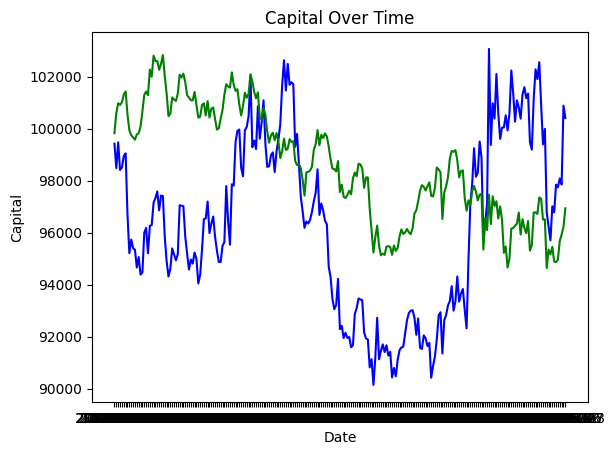

In [1051]:
plt.plot(data['Date'],data['New_Capital'], label="RELIANCE", color='blue')
plt.plot(data['Date'],nifty['New_Capital'], label="Nifty50", color='green')
plt.xlabel('Date')
plt.ylabel('Capital')
plt.title('Capital Over Time')
plt.show()

#
Q.1.(e) CONCLUSION


In [1052]:
print('''Considering Sharpe Ratio:-
Reliance has better sharpe ratio as compared to Nifty 50 so Reliance is better in investment as compared to Nifty 50
Considering Capital Return:-
Reliance has a better capital return as compared to Nifty 50
Considering Maximum Draawdown:-
But Reliance has greater drawdown as compared to Nifty 50
So,Reliance has better investment but it is more volatile as compared to Nifty 50
''')

Considering Sharpe Ratio:-
Reliance has better sharpe ratio as compared to Nifty 50 so Reliance is better in investment as compared to Nifty 50
Considering Capital Return:-
Reliance has a better capital return as compared to Nifty 50
Considering Maximum Draawdown:-
But Reliance has greater drawdown as compared to Nifty 50
So,Reliance has better investment but it is more volatile as compared to Nifty 50

